## 1D cruise track plots

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
### dm1d = pd.read_parquet("../models/anoms_sea_1d/val_predictions.pq")
#dm_largeseas =  pd.read_parquet("../models/anoms_sea_large/val_predictions.pq")
#dm_meanstd =  pd.read_parquet("../models/mean_std/val_predictions.pq")
dm_1d = pd.read_parquet("../models/anoms_sea_1d/selection_imputed.pq")
#AG5 = pd.read_parquet("../models/anoms_sea_1d/val_predictions_imputed_AG5.pq")
#dm_1d_noshift = pd.read_parquet("../models/anoms_sea_1d/val_predictions_imputed_noshifts.pq")
#dm_1d = dm_1d.reset_index("expocode", drop=False)
#AG5 = AG5.reset_index("expocode", drop=False)
#dm_1d_noshift = dm_1d_noshift.reset_index("expocode", drop=False)
mlp = pd.read_parquet("../models/sota_anoms64/test_predictions.pq")
#mlp = mlp[mlp.expocode=="AG5W20141113"]
#mlp = pd.read_parquet("../models/sota_anoms/val_predictions.pq")

In [25]:
dm_1d.index

MultiIndex([('069920190503',     316),
            ('069920190503',     317),
            ('069920190503',     318),
            ('069920190503',     319),
            ('069920190503',     320),
            ('069920190503',     321),
            ('069920190503',     322),
            ('069920190503',     323),
            ('069920190503',     324),
            ('069920190503',     325),
            ...
            ('SIJJ20170125', 5663043),
            ('SIJJ20170125', 5663044),
            ('SIJJ20170125', 5663045),
            ('SIJJ20170125', 5663046),
            ('SIJJ20170125', 5663047),
            ('SIJJ20170125', 5663048),
            ('SIJJ20170125', 5663049),
            ('SIJJ20170125', 5663050),
            ('SIJJ20170125', 5663051),
            ('SIJJ20170125', 5663052)],
           names=['expocode', 'index'], length=812465)

In [31]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_cruises(
    ax,
    truth,
    cruises,
    labels,
    consts=None,
    *,
    xlabel="distance (5km)",
    ylabel=r"$fCO_2$ ($\mu$atm)",
    title=None,
    label_fontsize=12,
    label_fontweight="normal",   # e.g. "bold"
    title_fontsize=14,
    title_fontweight="bold",
    tick_fontsize=10,
    xtick_step=64,
    fill_alpha=0.6,
    linewidth=2,
    legend=True,
    # NaN highlighting
    highlight_nans=False,
    nan_where="means",            # "truth", "means", or "both"
    nan_color="red",
    nan_alpha=0.6,
    nan_linewidth=1.5,
):
    """
    Plot truth and per-cruise mean ± c*std bands.
    Line and fill share colour; x-ticks rotated 45°; label/title sizing configurable.
    Optionally highlight NaN positions with vertical red lines.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
    truth : 1D array-like
    cruises : iterable of 2D arrays (shape: [T, ensemble_members])
    labels : iterable of str
    consts : iterable of float, optional
        Multiplier(s) for the std band (defaults to 1 for each cruise).
    highlight_nans : bool
        If True, draws vertical lines at x where data are NaN.
    nan_where : {"truth", "means", "both"}
        Which series to inspect for NaNs.
    """
    if consts is None:
        consts = [1] * len(cruises)

    # Truth line
    truth = np.asarray(truth, dtype=float)
    truth_line, = ax.plot(truth, linewidth=linewidth, label="SOCAT")

    nan_x = set()

    # Cruises: mean ± c*std
    for label, cruise, c in zip(labels, cruises, consts):
        cruise = np.asarray(cruise, dtype=float)
        mean = cruise.mean(axis=1)
        std  = cruise.std(axis=1)
        x = np.arange(cruise.shape[0])

        line, = ax.plot(
            mean,
            "--",
            label=label,
            linewidth=linewidth,
            markersize=5,
        )
        colour = line.get_color()
        ax.fill_between(
            x,
            mean - c * std,
            mean + c * std,
            alpha=fill_alpha,
            facecolor=colour,
            edgecolor="none",
        )

        if highlight_nans and nan_where in ("means", "both"):
            nan_x.update(x[np.isnan(mean)])

    if highlight_nans and nan_where in ("truth", "both"):
        nan_x.update(np.where(np.isnan(truth))[0])

    # Draw vertical NaN markers spanning the full axes height
    if highlight_nans and nan_x:
        for x0 in sorted(nan_x):
            ax.axvline(x=x0, color=nan_color, alpha=nan_alpha, linewidth=nan_linewidth)

    # Axes cosmetics
    ax.grid(True)
    ax.set_xlabel(xlabel, fontsize=label_fontsize, fontweight=label_fontweight)
    ax.set_ylabel(ylabel, fontsize=label_fontsize, fontweight=label_fontweight)
    if title is not None:
        ax.set_title(title, fontsize=title_fontsize, fontweight=title_fontweight)

    # X ticks and rotation
    if len(truth) > 0:
        ax.set_xticks(range(0, len(truth), xtick_step))
    ax.tick_params(axis="x", labelrotation=45)
    ax.tick_params(axis="both", which="major", labelsize=tick_fontsize)

    if legend:
        ax.legend()

        
def plot_sample(ax, cruise, title):
    ax.set_title(title)
    ax.plot(cruise[:, :2])
    ax.grid(True, axis="x")
    ax.set_xlabel("distance (5km)")
    ax.set_xticks(range(0, mean.size, 64))
    ax.set_ylabel(r"$fCO_2$($\mu$atm)")
    
def get_values(dfs, sample_names, expocode):
    xco2 = mlp.xco2.loc[mlp.expocode == expocode].values[:, None]
    fco2 = mlp.fco2rec_uatm.loc[mlp.expocode == expocode].values #+ xco2[:, 0]
    for (df, sname) in zip(dfs, sample_names):
        print(np.isnan(df.loc[df.expocode == expocode, sname].values).sum())
    return fco2, [df.loc[df.expocode == expocode, sname].values for (df, sname) in zip(dfs, sample_names)]

0
0


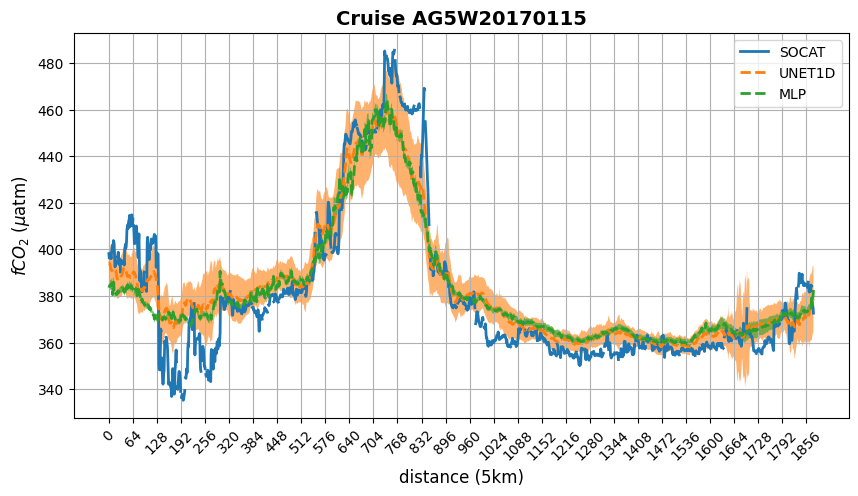

In [40]:
expocodes = mlp.expocode.unique()
expocode ="AG5W20170115" #"49P120080116"
#print((mlp.expocode == "58US20181201").sum())
fig, ax = plt.subplots(figsize=(10, 5))
dm_samples = [f'rec_{i}' for i in range(50)]
mlp_samples = [f'mlp_{i}' for i in range(20)]
fco2, cruises = get_values([ dm_1d, mlp], [dm_samples,]*1+[mlp_samples], expocode)#[dm_largeseas[dm_samples].values, dm_meanstd[dm_samples].values, dm_1d[dm_samples].values, mlp[mlp_samples].values]
plot_cruises(ax, fco2, cruises , [ 'UNET1D', 'MLP'], consts=[1, 1], highlight_nans=True, title=f"Cruise {expocode}")
plt.legend()
plt.show()

## MLP Stats

In [8]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from scipy.stats import pearsonr
import numpy as np
def get_df_err_stats(df, sample_cols):
    seamask = df.seamask.astype(bool)
    fco2_nans = ~df.fco2rec_uatm.isna()
    pred_nans = ~df.mlp_0.isna()
    mask = seamask & fco2_nans & pred_nans
    
    truth = df.loc[mask, "fco2rec_uatm"].values
    mean = df.loc[mask, sample_cols].mean(axis=1).values
    
    low = df.loc[mask, sample_cols].min(axis=1).values
    high = df.loc[mask, sample_cols].max(axis=1).values
    coverage = (truth >= low) & (truth <= high)
    
    rmse = root_mean_squared_error(truth, mean)
    r2 = r2_score(truth, mean)
    mae = mean_absolute_error(truth, mean)
    bias = (truth - mean).mean()
    
    # S: (n_rows, n_samp) samples from your model. Replace df.values with your samples.
    S = df.loc[mask, sample_cols].values            # shape (n_rows, 50) in your real case
    y = truth                # shape (n_rows,)

    levels = np.arange(0.1, 1.0, 0.1)  # 10%,...,90% central coverage

    q_lo = np.quantile(S, (1 - levels)/2, axis=1).T   # shape (n_rows, len(levels))
    q_hi = np.quantile(S, 1 - (1 - levels)/2, axis=1).T

    covered = ((y[:, None] >= q_lo) & (y[:, None] <= q_hi)).mean(axis=0)  # empirical coverage
    cal_dict = {f"{int(100*l)}%": c for l, c in zip(levels, covered)}
    
    # E|S - y|
    term1 = np.mean(np.abs(S - y[:, None]), axis=1)
    # 0.5 * E|S - S'|
    term2 = 0.5 * np.mean(np.abs(S[:, None, :] - S[:, :, None]), axis=(1,2))
    crps = term1 - term2                      # one score per row (lower is better)
    crps_mean = crps.mean()

    return dict({
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'bias': bias,
        'coverage': coverage.mean(),
        'samples_std': df.loc[mask, sample_cols].std(axis=1).mean(),
        'avg_interval_width': (high-low).mean(),
        'avg_interval_width_std': (high-low).std(),
        'max_interval_width': (high-low).max(),
        'r2_interval_width_error': r2_score((truth-mean)**2, df.loc[mask, sample_cols].var(axis=1)),
        'corr_variance_error': pearsonr((truth-mean)**2, df.loc[mask, sample_cols].var(axis=1))[0],
        'ratio_error_interval_width': (mae/(high-low)).mean(),
        'calibration': cal_dict,
        'crps': crps_mean
    })

In [17]:
import pandas as pd
test_preds = pd.read_parquet("../models/anoms_sea_1d/eta_0_test_samples.pq")
test_mlp = pd.read_parquet("../models/sota_anoms64_big/test_predictions.pq")
pred_mask = pd.read_parquet("../models/anoms_sea_1d/pred_nans.pq")

In [18]:
pred_mask.head()

,0
0,False
1,False
2,False
3,False
4,False


In [19]:
test_preds['co2_clim8d'].head()

0   -58.137474
1   -56.674156
2   -56.674156
3   -56.674156
4   -56.674156
Name: co2_clim8d, dtype: float32

In [20]:
test_preds.fco2rec_uatm.head()

0    344.883606
1    338.870941
2    317.581055
3    303.302032
4    304.997925
Name: fco2rec_uatm, dtype: float64

In [21]:
np.allclose(test_mlp.fco2rec_uatm.values, test_preds.fco2rec_uatm.values, equal_nan=True)

True

In [5]:
test_mlp.head()

,index,expocode,window_id,time_1d,lat,lon,sal,sst_deg_c,pppp_hpa,woa_sss,...,mlp_40,mlp_41,mlp_42,mlp_43,mlp_44,mlp_45,mlp_46,mlp_47,mlp_48,mlp_49
316,316,069920190503,0,2019-05-04,47.643352,-3.976877,33.874794,12.760501,NaN,35.0,...,346.556671,340.158844,342.534393,346.253815,344.041809,340.021271,340.484894,340.518829,342.409882,340.843536
317,317,069920190503,1,2019-05-04,47.643556,-4.045207,34.060921,12.566983,NaN,35.0,...,348.806458,344.553711,345.877838,347.910156,348.568756,343.356934,341.004974,346.355927,349.839294,343.593964
318,318,069920190503,2,2019-05-04,47.653791,-4.108304,34.134563,12.737556,NaN,35.0,...,349.449829,345.263763,346.660370,348.366028,349.947144,344.945587,341.993958,347.124329,350.328674,345.543213
319,319,069920190503,3,2019-05-04,47.663978,-4.172930,34.108986,12.845666,NaN,35.0,...,349.079254,344.756500,346.153381,348.035400,348.978912,343.914032,341.412048,346.611145,349.984131,344.735321
320,320,069920190503,4,2019-05-04,47.671709,-4.239331,34.235008,12.808307,NaN,35.0,...,348.586395,344.361847,345.709198,347.756805,348.377930,343.022064,340.856384,346.175446,349.599945,342.912262


In [14]:
mlp_sample_cols = [f"mlp_{i}" for i in range(50)]
get_df_err_stats(test_mlp.iloc[pred_mask.values], mlp_sample_cols)
#get_df_err_stats(test_mlp, mlp_sample_cols)

{'rmse': 18.06346842167456,
 'mae': 11.13212442357682,
 'r2': 0.8052833547925657,
 'bias': 1.5007128395894829,
 'coverage': 0.3564053655070149,
 'samples_std': 2.409771,
 'avg_interval_width': 10.972075,
 'avg_interval_width_std': 6.6915135,
 'max_interval_width': 180.74576,
 'r2_interval_width_error': -0.04017844771254109,
 'corr_variance_error': 0.3391488374068653,
 'ratio_error_interval_width': 1.2380344,
 'calibration': {'10%': 0.020489161403022444,
  '20%': 0.04076931707928797,
  '30%': 0.06143448330484255,
  '40%': 0.08389489872022493,
  '50%': 0.10779195349952589,
  '60%': 0.13332145300781242,
  '70%': 0.1632268724163042,
  '80%': 0.19976107345341262,
  '90%': 0.2507056693353398},
 'crps': 9.984164728324528}

## Videos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

def animate_surface_samples(
        df: pd.DataFrame,
        grid_shape: tuple[int, int] | None = None,
        *,
        mode: str = "mean",          # "mean" or "sample"
        sample_id: str = "sample_0", # used only if mode == "sample"
        interval: int = 200,         # ms between frames
        cmap=None,                   # matplotlib colormap or None
        save_as: str | None = None,  # e.g. "movie.gif" or "movie.mp4"
        writer: str = "pillow",      # "pillow" for GIF, "ffmpeg" for MP4
        # --- colourbar options ---
        cbar: bool = True,
        cbar_label: str | None = None,
        cbar_fraction: float = 0.046,
        cbar_pad: float = 0.04,
        box: tuple[int, int, int, int] | None = None# to pick image subset
    ):
    """
    Animate daily surface estimates stored in a DataFrame, with optional colourbar.
    """
    if mode not in {"mean", "sample"}:
        raise ValueError("mode must be 'mean' or 'sample'")

    # Deduce grid shape if possible
    if grid_shape is None:
        if isinstance(df.index, pd.MultiIndex) and df.index.nlevels == 2:
            ys, xs = (df.index.get_level_values(i).unique() for i in (0, 1))
            grid_shape = (len(ys), len(xs))
        else:
            raise ValueError("grid_shape must be provided when index "
                             "is not a 2-level MultiIndex")

    # extract seamask and remove column
    seamask = df["seamask"].values.reshape(grid_shape)
    df = df.drop(columns=["seamask"], level=0)

    # Collapse or slice the sample dimension
    if mode == "mean":
        daily = df.groupby(level=0, axis=1).mean()
    else:
        daily = df.xs(sample_id, level=1, axis=1)

    dates = daily.columns
    if box is not None:
        y_min, x_min, y_max, x_max = box
        cube = np.stack([daily[date].values.reshape(grid_shape)[y_min:y_max, x_min:x_max][:, ::-1] for date in dates])
        seamask = seamask[y_min:y_max, x_min:x_max][:, ::-1]
    else:
        cube = np.stack([daily[date].values.reshape(grid_shape)[:, ::-1] for date in dates])
        seamask = seamask[:, ::-1]

    # robust colour limits
    vmin, vmax = np.percentile(cube, [2, 95])

    fig, ax = plt.subplots()
    im = ax.imshow(cube[0], origin="lower", cmap=cmap, vmin=vmin, vmax=vmax)
    title = ax.set_title(str(dates[0]))

    # --- colourbar ---
    if cbar:
        cb = fig.colorbar(im, ax=ax, fraction=cbar_fraction, pad=cbar_pad)
        if cbar_label:
            cb.set_label(cbar_label)

    def update(frame):
        # mask land each frame (does not alter other frames)
        slice_ = cube[frame].copy()
        slice_[~seamask] = np.nan
        im.set_array(slice_)
        title.set_text(str(dates[frame]))
        return im, title

    ani = FuncAnimation(fig, update, frames=len(dates),
                        interval=interval, blit=True)

    if save_as is not None:
        ani.save(save_as, writer=writer)

    return ani


mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-j9lnmir7 because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [1]:
import pandas as pd
series_name = "eq_pac2"
df = pd.read_parquet(f"../models/anoms_sea_1d/{series_name}.pq")
df = df.reset_index("patch_pix")

In [2]:
df

patch_pix  2022-06-01                          \
                                   sample_0    sample_1    sample_2   
lat        lon                                                        
-41.760288 240.000000   7340032  389.092407  388.635773  415.018341   
-41.710300 239.956055   7340034  390.046478  404.437744  379.716980   
-41.660355 239.912109   7340040  391.199951  397.527130  389.585480   
-41.610443 239.868164   7340042  391.507507  384.951996  386.135986   
-41.560574 239.824219   7340064  391.676758  389.068420  399.915100   
...                         ...         ...         ...         ...   
 41.560574 240.175781   8388575  396.204987  398.740234  429.282776   
 41.610443 240.131836   8388597  404.658234  427.717346  397.917480   
 41.660355 240.087891   8388599  388.361145  386.212036  391.924927   
 41.710300 240.043945   8388605  378.016998  412.711639  415.153870   
 41.760288 240.000000   8388607  390.649536  409.776245  428.406952   

                                                                       \
                         sample_3    sample_4    sample_5    sample_6   
lat        lon                                                          
-41.760288 240.000000  392.554871  394.124390  390.453552  389.952423   
-41.710300 239.956055  390.176605  383.624847  402.111725  392.004669   
-41.660355 239.912109  369.459991  385.202148  389.276794  391.162231   
-41.610443 239.868164  373.497101  390.884827  378.902710  391.532379   
-41.560574 239.824219  386.492920  391.157196  393.088226  396.261017   
...                           ...         ...         ...         ...   
 41.560574 240.175781  399.668549  405.862976  407.944611  419.506500   
 41.610443 240.131836  389.943329  419.625458  428.866150  390.721771   
 41.660355 240.087891  379.758026  392.463928  406.621460  424.432007   
 41.710300 240.043945  419.952789  420.495667  410.201141  370.624634   
 41.760288 240.000000  402.943817  430.393555  405.800323  417.113892   

                                               ...  2022-10-01              \
                         sample_7    sample_8  ...    sample_1    sample_2   
lat        lon                                 ...                           
-41.760288 240.000000  390.736145  397.111206  ...  391.580322  386.099854   
-41.710300 239.956055  390.876160  398.066650  ...  390.817657  385.812744   
-41.660355 239.912109  389.599213  398.519592  ...  388.706238  385.700287   
-41.610443 239.868164  387.760742  392.248901  ...  390.057220  385.896057   
-41.560574 239.824219  384.159668  390.723480  ...  386.803192  386.684570   
...                           ...         ...  ...         ...         ...   
 41.560574 240.175781  388.171997  371.776367  ...  401.525909  401.922333   
 41.610443 240.131836  389.084290  412.471619  ...  384.295837  386.739349   
 41.660355 240.087891  400.099640  394.921722  ...  385.153229  429.697754   
 41.710300 240.043945  399.115540  415.233704  ...  409.950104  383.599274   
 41.760288 240.000000  385.063660  403.495514  ...  405.864990  405.498871   

                                                                       \
                         sample_3    sample_4    sample_5    sample_6   
lat        lon                                                          
-41.760288 240.000000  389.044830  396.533112  387.842743  388.432983   
-41.710300 239.956055  389.249054  382.590881  380.561157  388.816650   
-41.660355 239.912109  389.195801  383.192505  398.055634  389.665680   
-41.610443 239.868164  389.057281  383.321777  387.857086  390.420380   
-41.560574 239.824219  389.185242  395.348083  385.151733  391.468475   
...                           ...         ...         ...         ...   
 41.560574 240.175781  412.613525  432.932159  389.743408  387.844208   
 41.610443 240.131836  426.092804  416.301056  384.235931  397.789337   
 41.660355 240.087891  421.093628  375.111053  382.531830  386.021606   
 41.710300 240.043945  398.529846  

In [4]:
df.columns

MultiIndex([( 'patch_pix',         ''),
            ('2022-06-01', 'sample_0'),
            ('2022-06-01', 'sample_1'),
            ('2022-06-01', 'sample_2'),
            ('2022-06-01', 'sample_3'),
            ('2022-06-01', 'sample_4'),
            ('2022-06-01', 'sample_5'),
            ('2022-06-01', 'sample_6'),
            ('2022-06-01', 'sample_7'),
            ('2022-06-01', 'sample_8'),
            ...
            ('2022-10-01', 'sample_1'),
            ('2022-10-01', 'sample_2'),
            ('2022-10-01', 'sample_3'),
            ('2022-10-01', 'sample_4'),
            ('2022-10-01', 'sample_5'),
            ('2022-10-01', 'sample_6'),
            ('2022-10-01', 'sample_7'),
            ('2022-10-01', 'sample_8'),
            ('2022-10-01', 'sample_9'),
            (   'seamask',         '')],
           length=1232)

In [5]:
df = df.drop(columns=["patch_pix"], level=0)

In [6]:
df

2022-06-01                                      \
                         sample_0    sample_1    sample_2    sample_3   
lat        lon                                                          
-41.760288 240.000000  389.092407  388.635773  415.018341  392.554871   
-41.710300 239.956055  390.046478  404.437744  379.716980  390.176605   
-41.660355 239.912109  391.199951  397.527130  389.585480  369.459991   
-41.610443 239.868164  391.507507  384.951996  386.135986  373.497101   
-41.560574 239.824219  391.676758  389.068420  399.915100  386.492920   
...                           ...         ...         ...         ...   
 41.560574 240.175781  396.204987  398.740234  429.282776  399.668549   
 41.610443 240.131836  404.658234  427.717346  397.917480  389.943329   
 41.660355 240.087891  388.361145  386.212036  391.924927  379.758026   
 41.710300 240.043945  378.016998  412.711639  415.153870  419.952789   
 41.760288 240.000000  390.649536  409.776245  428.406952  402.943817   

                                                                       \
                         sample_4    sample_5    sample_6    sample_7   
lat        lon                                                          
-41.760288 240.000000  394.124390  390.453552  389.952423  390.736145   
-41.710300 239.956055  383.624847  402.111725  392.004669  390.876160   
-41.660355 239.912109  385.202148  389.276794  391.162231  389.599213   
-41.610443 239.868164  390.884827  378.902710  391.532379  387.760742   
-41.560574 239.824219  391.157196  393.088226  396.261017  384.159668   
...                           ...         ...         ...         ...   
 41.560574 240.175781  405.862976  407.944611  419.506500  388.171997   
 41.610443 240.131836  419.625458  428.866150  390.721771  389.084290   
 41.660355 240.087891  392.463928  406.621460  424.432007  400.099640   
 41.710300 240.043945  420.495667  410.201141  370.624634  399.115540   
 41.760288 240.000000  430.393555  405.800323  417.113892  385.063660   

                                               ...  2022-10-01              \
                         sample_8    sample_9  ...    sample_1    sample_2   
lat        lon                                 ...                           
-41.760288 240.000000  397.111206  399.691010  ...  391.580322  386.099854   
-41.710300 239.956055  398.066650  394.862701  ...  390.817657  385.812744   
-41.660355 239.912109  398.519592  392.458221  ...  388.706238  385.700287   
-41.610443 239.868164  392.248901  399.880920  ...  390.057220  385.896057   
-41.560574 239.824219  390.723480  383.009003  ...  386.803192  386.684570   
...                           ...         ...  ...         ...         ...   
 41.560574 240.175781  371.776367  434.411835  ...  401.525909  401.922333   
 41.610443 240.131836  412.471619  383.500854  ...  384.295837  386.739349   
 41.660355 240.087891  394.921722  392.878967  ...  385.153229  429.697754   
 41.710300 240.043945  415.233704  429.336639  ...  409.950104  383.599274   
 41.760288 240.000000  403.495514  373.553314  ...  405.864990  405.498871   

                                                                       \
                         sample_3    sample_4    sample_5    sample_6   
lat        lon                                                          
-41.760288 240.000000  389.044830  396.533112  387.842743  388.432983   
-41.710300 239.956055  389.249054  382.590881  380.561157  388.816650   
-41.660355 239.912109  389.195801  383.192505  398.055634  389.665680   
-41.610443 239.868164  389.057281  383.321777  387.857086  390.420380   
-41.560574 239.824219  389.185242  395.348083  385.151733  391.468475   
...                           ...         ...         ...         ...   
 41.560574 240.175781  412.613525  432.932159  389.743408  387.844208   
 41.610443 240.131836  426.092804  416.301056  384.235931  397.789337   
 41.660355 240.087891  421.093628  375.111053  382.531830  386.021606   
 41.7103

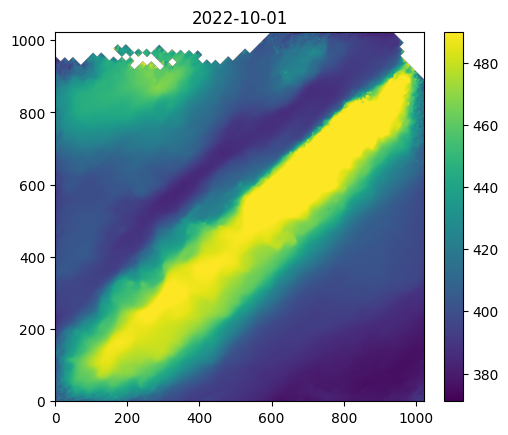

In [7]:
ny = 2**10
nx = 2**10
ani = animate_surface_samples(
        df,
        grid_shape=(ny, nx),   # supply if not inferable
        mode="sample",           # or "sample"
        interval=150,
        save_as=f"../models/anoms_sea_1d/{series_name}.gif"  # requires Pillow; use ".mp4" with ffmpeg
    )

## Time Series Stats

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_surface_stat(
    df: pd.DataFrame,
    grid_shape: tuple[int, int] | None = None,
    *,
    stat: str = "mean",                 # "mean" or "std"
    seamask_col: str = "seamask",       # 1=ocean, 0=land
    ddof: int = 0,                      # used when stat=="std"
    box: tuple[int,int,int,int] | None = None,  # (y0,y1,x0,x1)
    flip_lr: bool = True,
    # colourmap / limits
    cmap_mean = "RdYlBu_r",
    cmap_std  = "RdBu_r",
    robust: bool = True,
    robust_percentiles = (2, 98),
    vmin: float | None = None,
    vmax: float | None = None,
    # layout / typography
    figsize = (6, 5),
    title_size: int = 14,
    title_weight: str = "bold",
    tick_size: int = 10,
    tick_weight: str = "normal",
    cbar_label: str | None = None,      # if None, set automatically
    cbar_label_size: int = 12,
    cbar_label_weight: str = "bold",
    remove_axis_labels: bool = True,
    remove_ticks: bool = False,
):
    """
    df.columns must be a MultiIndex (date, sample_id). df[seamask_col] is required on the row index grid.
    stat="mean": mean over samples per day, then mean over days.
    stat="std" : std over samples per day, then mean of those stds over days.
    """
    if stat not in {"mean", "std"}:
        raise ValueError("stat must be 'mean' or 'std'")

    # Deduce grid shape if needed
    if grid_shape is None:
        if isinstance(df.index, pd.MultiIndex) and df.index.nlevels == 2:
            ys, xs = (df.index.get_level_values(i).unique() for i in (0, 1))
            grid_shape = (len(ys), len(xs))
        else:
            raise ValueError("grid_shape must be provided when index is not a 2-level MultiIndex")
    ny, nx = grid_shape

    # Seamask
    if seamask_col not in df.columns:
        raise ValueError(f"Expected a '{seamask_col}' column in df.")
    seamask = df[seamask_col].to_numpy().reshape(ny, nx).astype(bool)

    # Drop seamask from working data
    X = df.drop(columns=[seamask_col], errors="ignore")

    # Compute desired statistic at each grid point
    if stat == "mean":
        # mean across samples per day, then mean across days
        daily_mean = X.groupby(level=0, axis=1).mean()
        series_1d = daily_mean.mean(axis=1)
        default_title = "Mean over all samples and days"
        default_cbar  = r"Mean $fCO_2$ [µatm]"
        cmap = cmap_mean
    else:
        # std across samples per day, then mean across days
        acc = np.zeros(ny*nx)
        k=0
        for date, sub in X.groupby(level=0, axis=1):
            day_std = sub.std(axis=1)
            acc += day_std
            k+=1
        series_1d = acc / k
        #daily_std = X.groupby(level=0, axis=1).std(ddof=ddof)
        #series_1d = daily_std.mean(axis=1)
        default_title = "Mean (over days) of per-day std across samples"
        default_cbar  = r"Mean daily std over samples [µatm]"
        cmap = cmap_std

    # Reshape, optionally crop/flip, and mask land as NaN
    def to_map(series_1d):
        arr = series_1d.to_numpy().reshape(ny, nx)
        sm = seamask
        if box is not None:
            y0, y1, x0, x1 = box
            arr = arr[y0:y1, x0:x1]
            sm  = sm [y0:y1, x0:x1]
        if flip_lr:
            arr = arr[:, ::-1]
            sm  = sm [:, ::-1]
        return np.where(sm, arr, np.nan)

    field = to_map(series_1d)

    # Colour limits
    if vmin is None or vmax is None:
        if robust:
            vmin, vmax = np.nanpercentile(field, robust_percentiles)
        else:
            vmin, vmax = float(np.nanmin(field)), float(np.nanmax(field))

    # Plot single panel with colourbar below
    fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)
    im = ax.imshow(field, origin="lower", cmap=cmap, vmin=vmin, vmax=vmax)

    ax.set_title(default_title, fontsize=title_size, fontweight=title_weight)
    if remove_axis_labels:
        ax.set_xlabel(""); ax.set_ylabel("")
    ax.tick_params(axis="both", labelsize=tick_size)
    for lbl in ax.get_xticklabels() + ax.get_yticklabels():
        lbl.set_fontweight(tick_weight)
    if remove_ticks:
        ax.set_xticks([]); ax.set_yticks([])

    label = default_cbar if cbar_label is None else cbar_label
    cbar = fig.colorbar(im, ax=ax, orientation="horizontal", pad=0.08, fraction=0.08)
    cbar.set_label(label, fontsize=cbar_label_size, fontweight=cbar_label_weight)
    cbar.ax.tick_params(labelsize=cbar_label_size)

    return fig, ax

/tmp/ipykernel_778/4082589873.py:70: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for date, sub in X.groupby(level=0, axis=1):


(<Figure size 600x500 with 2 Axes>,
 <Axes: title={'center': 'Mean (over days) of per-day std across samples'}>)

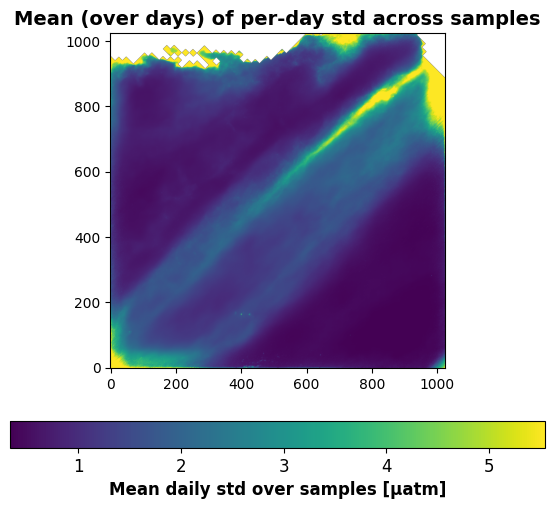

In [9]:
ny = 2**10
nx = 2**10
plot_surface_stat(df, grid_shape=(ny,nx), stat="std", cmap_mean="viridis", cmap_std="viridis")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

def plot_surface_frames(
    df: pd.DataFrame,
    dates,
    grid_shape: tuple[int, int] | None = None,
    *,
    mode: str = "mean",            # "mean" or "sample"
    sample_id: str = "sample_0",   # used only if mode == "sample"
    cmap=None,                     # matplotlib colormap or None
    box=None,                      # (y_min, y_max, x_min, x_max)
    flip_lr: bool = True,          # mirror left-right as in your code
    # colour scaling (shared across all panels)
    robust: bool = True,
    robust_percentiles=(2, 98),
    vmin: float | None = None,
    vmax: float | None = None,
    # layout
    ncols: int | None = None,      # if None → all panels in one row
    figsize_per_panel=(5, 4),
    # typography
    title_size: int = 14,
    title_weight: str = "bold",
    tick_size: int = 10,
    tick_weight: str = "normal",
    cbar_label: str = r"f$CO_2$ [µatm]",
    cbar_label_size: int = 12,
    cbar_label_weight: str = "bold",
    remove_axis_labels: bool = True,
    remove_ticks: bool = False,
):
    """
    Plot one image per date with a single shared colourbar beneath all panels.

    Expects df columns to be a MultiIndex: (date, sample_id) and a column
    'seamask' on the same index (1=ocean, 0=land).
    """
    # Deduce grid shape if needed
    if grid_shape is None:
        if isinstance(df.index, pd.MultiIndex) and df.index.nlevels == 2:
            ys, xs = (df.index.get_level_values(i).unique() for i in (0, 1))
            grid_shape = (len(ys), len(xs))
        else:
            raise ValueError("grid_shape must be provided when index is not a 2-level MultiIndex")
    ny, nx = grid_shape

    # Seamask (assumed 1=ocean, 0=land); convert to boolean
    if "seamask" not in df:
        raise ValueError("Expected a 'seamask' column in df.")
    seamask = df.seamask.values.reshape(grid_shape).astype(bool)

    # Choose data slice: mean over samples or a single sample
    if mode == "mean":
        daily = df.groupby(level=0, axis=1).mean()
    elif mode == "sample":
        daily = df.xs(sample_id, level=1, axis=1)
    else:
        raise ValueError("mode must be 'mean' or 'sample'")

    # Build frames with optional cropping and left-right flip; apply seamask
    frames = []
    for d in dates:
        arr = daily[d].values.reshape(ny, nx)
        if box is not None:
            y_min, y_max, x_min, x_max = box
            arr = arr[y_min:y_max, x_min:x_max]
            sm  = seamask[y_min:y_max, x_min:x_max]
        else:
            sm = seamask
        if flip_lr:
            arr = arr[:, ::-1]
            sm  = sm[:, ::-1]
        arr = np.where(sm, arr, np.nan)   # mask land as NaN
        frames.append(arr)
    cube = np.stack(frames, axis=0)       # shape: (n_dates, H, W)

    # Shared colour limits
    if vmin is None or vmax is None:
        if robust:
            vmin, vmax = np.nanpercentile(cube, robust_percentiles)
        else:
            vmin, vmax = float(np.nanmin(cube)), float(np.nanmax(cube))

    # Layout
    n = len(dates)
    if ncols is None:
        ncols = n
    nrows = math.ceil(n / ncols)
    fig_w = figsize_per_panel[0] * ncols
    fig_h = figsize_per_panel[1] * nrows
    fig, axs = plt.subplots(nrows, ncols, figsize=(fig_w, fig_h), squeeze=False, sharex=True, sharey=True, constrained_layout=True)

    ims = []
    for ax, arr, d in zip(axs.ravel(), cube, dates):
        im = ax.imshow(arr, origin="lower", cmap=cmap, vmin=vmin, vmax=vmax)
        ims.append(im)
        ax.set_title(str(d), fontsize=title_size, fontweight=title_weight)
        if remove_axis_labels:
            ax.set_xlabel(""); ax.set_ylabel("")
        ax.tick_params(axis="both", labelsize=tick_size)
        for lbl in ax.get_xticklabels() + ax.get_yticklabels():
            lbl.set_fontweight(tick_weight)
        if remove_ticks:
            ax.set_xticks([]); ax.set_yticks([])

    # Hide any unused axes
    for ax in axs.ravel()[len(dates):]:
        ax.set_visible(False)

    # Single shared horizontal colourbar below all panels
    cbar = fig.colorbar(
        ims[0],
        ax=axs.ravel().tolist(),
        orientation="horizontal",
        fraction=0.06,
        pad=0.10
    )
    cbar.set_label(cbar_label, fontsize=cbar_label_size, fontweight=cbar_label_weight)
    cbar.ax.tick_params(labelsize=cbar_label_size)

    #plt.tight_layout()
    return fig, axs


mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-95o2vgbh because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import pandas as pd
df = pd.read_parquet("../models/anoms_sea_1d/eq_pac_uncond.pq")

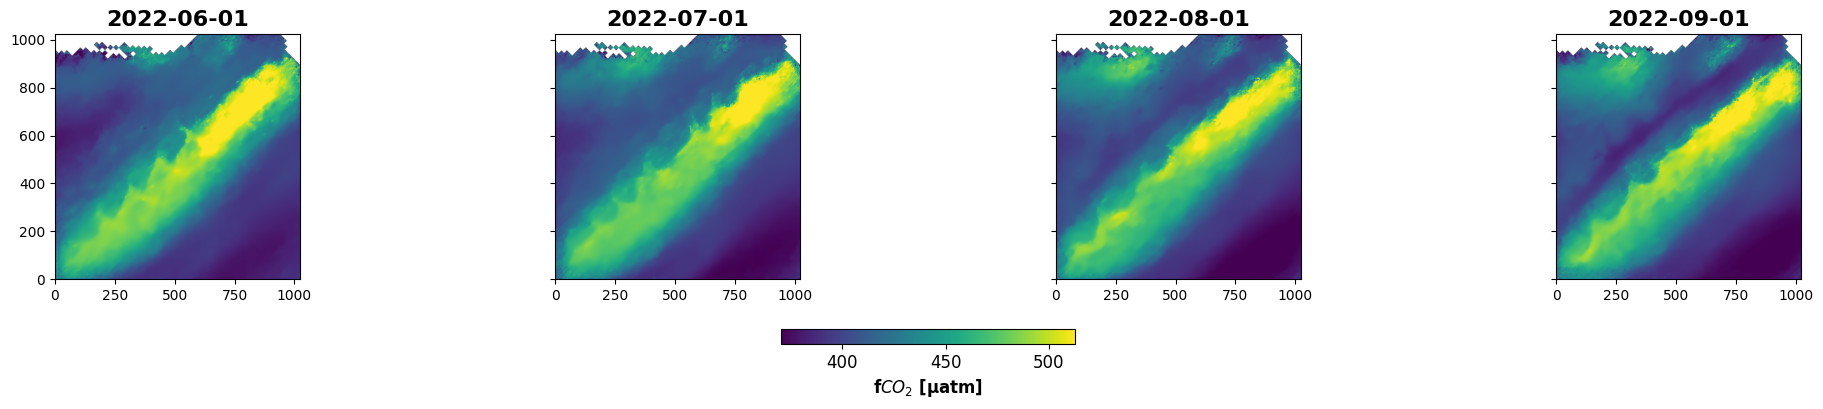

In [3]:
fig, axs = plot_surface_frames(
    df,
    dates=["2022-06-01", "2022-07-01", "2022-08-01", "2022-09-01"],
    grid_shape=(2**10, 2**10),
    mode="sample",
    sample_id="sample_0",
    cmap="viridis",
    ncols=4,
    title_size=16, title_weight="bold",
    tick_size=10, tick_weight="normal",
    cbar_label=r"f$CO_2$ [µatm]",
    cbar_label_size=12, cbar_label_weight="bold",
    remove_axis_labels=True, remove_ticks=False,
)
plt.show()


## SOCAT Test Set Plot

In [1]:
import pandas as pd
pred_columns = [f"mlp_{i}" for i in range(20)]
save_dir = "sota_anoms64/"
info_df = pd.read_parquet(f"../models/{save_dir}test_predictions.pq")

mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-l99hxvt6 because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


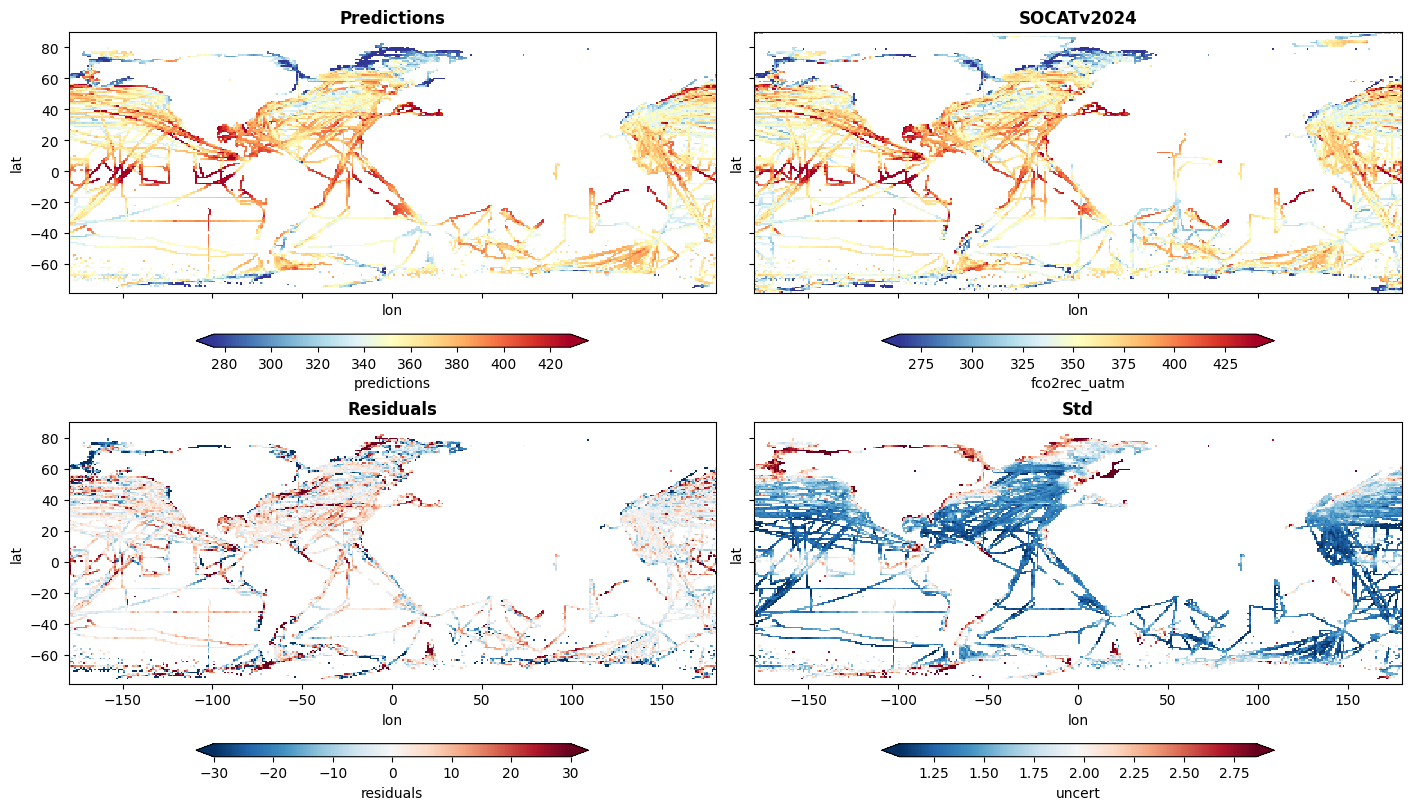

In [2]:
group_cols = ['lat', 'lon']
info_df['predictions'] = info_df.loc[:, pred_columns].mean(axis=1)
info_df['uncert'] = info_df.loc[:, pred_columns].std(axis=1)
info_df['residuals'] = info_df['fco2rec_uatm'] - info_df['predictions']
# round group_cols to int
info_df[group_cols] = (info_df[group_cols] * 20).round(0) / 20.0
info_cols =  ['predictions', 'fco2rec_uatm', 'residuals', 'uncert', 'seamask'] 
plotting_data = info_df.loc[:, group_cols + info_cols].groupby(group_cols).mean().to_xarray().coarsen(lat=20, lon=20, boundary='pad').mean()

import numpy as np
import matplotlib.pyplot as plt

# --- customise here ---
title_weight = "bold"     # e.g. "normal", "bold", or a numeric weight
cbar_kwargs = dict(
    orientation="horizontal",  # put colourbars below
    pad=0.06,                  # gap between image and colourbar
    fraction=0.05,             # thickness of the colourbar
    aspect=30,                 # length/thickness ratio
)
# ----------------------

fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True, constrained_layout=True)

plotting_data.predictions.plot.imshow(
    robust=True, ax=axs[0, 0], cmap="RdYlBu_r", add_colorbar=True, cbar_kwargs=cbar_kwargs
)
axs[0, 0].set_title("Predictions", fontweight=title_weight)

plotting_data.fco2rec_uatm.plot.imshow(
    robust=True, ax=axs[0, 1], cmap="RdYlBu_r", add_colorbar=True, cbar_kwargs=cbar_kwargs
)
axs[0, 1].set_title("SOCATv2024", fontweight=title_weight)

plotting_data.residuals.plot.imshow(
    robust=True, ax=axs[1, 0], cmap="RdBu_r", vmin=-30, vmax=30, add_colorbar=True, cbar_kwargs=cbar_kwargs
)
axs[1, 0].set_title("Residuals", fontweight=title_weight)

np.sqrt(plotting_data.uncert).plot.imshow(
    robust=True, ax=axs[1, 1], cmap="RdBu_r", add_colorbar=True, cbar_kwargs=cbar_kwargs
)
axs[1, 1].set_title("Std", fontweight=title_weight)

plt.show()


## Calibration Scores

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_calibration_comparison_multi(
    cal_a: dict,
    cals_b,                       # dict[name -> dict] or list[(name, dict)]
    label_a: str = "Model A",
    title: str = "Calibration vs Nominal Coverage",
    figsize=(6, 4),
    line_width=2.0,
    marker_size=6,
    title_size=14,
    label_size=12,
    tick_size=10,
    legend_size=10,
    text_weight="bold",
    grid=True,
    savepath=None,
):
    """
    Compare one primary calibration curve against multiple others.

    Parameters
    ----------
    cal_a : dict
        Primary model calibration, e.g. {"10%": 0.48, ..., "90%": 0.87}.
    cals_b : dict[str, dict] | list[tuple[str, dict]]
        Comparison calibrations with names.
    """

    def _parse(cal):
        # Accept keys like "10%", 10, 0.1; return dict with float keys in [0,1]
        out = {}
        for k, v in cal.items():
            if isinstance(k, str):
                k = k.replace("%", "")
            k = float(k)
            if k > 1:
                k = k / 100.0
            out[k] = float(v)
        return out

    # Normalise cals_b into list[(name, dict)]
    if isinstance(cals_b, dict):
        cals_b_list = list(cals_b.items())
    else:
        cals_b_list = list(cals_b)

    A = _parse(cal_a)
    Bs = [(name, _parse(cal)) for name, cal in cals_b_list]

    # Intersection of nominal levels across ALL curves
    level_sets = [set(A.keys())] + [set(cal.keys()) for _, cal in Bs]
    levels = sorted(set.intersection(*level_sets))
    if not levels:
        raise ValueError("No overlapping percentile keys across the provided dictionaries.")

    yA = [A[p] for p in levels]
    yBs = [(name, [cal[p] for p in levels]) for name, cal in Bs]

    # Plot
    fig, ax = plt.subplots(figsize=figsize)

    # Perfect calibration line
    ax.plot(
        levels, levels,
        linestyle="--",
        linewidth=line_width + 1.0,
        label="Perfect (y = x)",
        zorder=1,
    )

    # Primary model (circles)
    ax.plot(
        levels, yA,
        marker="o",
        linewidth=line_width,
        markersize=marker_size,
        label=label_a,
        zorder=2,
    )

    # Comparison models (carets)
    for name, y in yBs:
        ax.plot(
            levels, y,
            marker="^",
            linewidth=line_width,
            markersize=marker_size,
            label=name,
            zorder=2,
        )

    # Labels, ticks, limits, aspect
    ax.set_title(title, fontsize=title_size, fontweight=text_weight)
    ax.set_xlabel("Nominal coverage", fontsize=label_size, fontweight=text_weight)
    ax.set_ylabel("Empirical coverage", fontsize=label_size, fontweight=text_weight)

    ax.set_xticks(np.arange(0.1, 0.91, 0.1))
    ax.set_yticks(np.arange(0.0, 1.01, 0.1))
    ax.tick_params(axis="both", labelsize=tick_size)

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.0)
    ax.set_aspect("equal", adjustable="box")

    if grid:
        ax.grid(True, linewidth=0.8, alpha=0.4)

    # Legend
    leg = ax.legend(fontsize=legend_size, frameon=False, ncol=1)
    for text in leg.get_texts():
        text.set_fontweight(text_weight)

    if savepath:
        plt.savefig(savepath, bbox_inches="tight")
    return fig, ax


mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-jigu4yjn because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


score mlp: 0.01562128333333334
score unet1D: 0.008213436159261886


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Calibration Comparison'}, xlabel='Nominal coverage', ylabel='Empirical coverage'>)

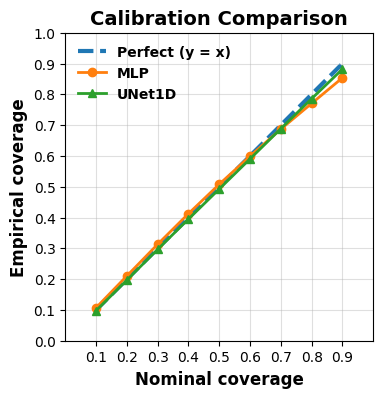

In [13]:
from pathlib import Path
import json
path = Path("../models/anoms_sea_1d/eta_0_error_stats_50recs.json")
with path.open("r") as f:
    dm_cal = json.load(f)['test_err_stats']['calibration']

cal_a = {"10%": 0.11, "20%": 0.21, "30%": 0.31, "40%": 0.41, "50%": 0.50,
         "60%": 0.60, "70%": 0.69, "80%": 0.79, "90%": 0.88}

perfect = np.arange(0.1, 1, 0.1)
scores_mlp = [0.10720894, 0.21041597, 0.31316978, 0.4125883 , 0.50803792,
       0.59945923, 0.68705023, 0.77057551, 0.85374439]
scores_unet1d = np.array(list(dm_cal.values()))
print(f"score mlp: {np.mean(np.abs(scores_mlp-perfect))}")
print(f"score unet1D: {np.mean(np.abs(scores_unet1d-perfect))}")

cals = [f"{num}%" for num in range(10, 100, 10)]
mlp_optcal = dict(zip(cals, scores_mlp))

plot_calibration_comparison_multi(mlp_optcal, {"UNet1D": dm_cal}, label_a="MLP", title="Calibration Comparison")


## Global HEALPix Inferences

In [1]:
import pandas as pd
import xarray as xr
import healpy as hp
import numpy as np
nside = 2**10
dm_cols = [f"sample_{i}" for i in range(20)]
mlp_cols = [f"mlp_{i}" for i in range(20)]
df = pd.read_parquet("../models/anoms_sea_1d/global.pq")
df2 = pd.read_parquet("../models/sota_anoms64_big/global.pq")
lon, lat = hp.pix2ang(nside, df.index.values, nest=True, lonlat=True)
df['lon'] = (lon + 180) % 360 - 180
df['lat'] = lat
df['time'] = pd.Timestamp("2022-10-04")
df.loc[df.seamask==0, dm_cols] = np.nan

# move mlp data to dm df
df['dm_mean'] = df[dm_cols].mean(axis=1) 
df['dm_std'] = df[dm_cols].std(axis=1) 
df['mlp_mean'] = df2[mlp_cols].mean(axis=1)
df['mlp_std'] = df2[mlp_cols].std(axis=1)
df['mlp_sample'] = df2[mlp_cols[0]]
df.loc[df.seamask==0, ['mlp_mean', 'mlp_std', 'mlp_sample']] = np.nan

sample_ds = df
sample_ds['lon'] = np.round(sample_ds['lon']*10, 0) / 10 #cast to 0.1 resoulution
sample_ds['lat'] = np.round(sample_ds['lat']*10, 0) / 10
sample_ds.set_index(['lon', 'lat', 'time'], inplace=True)
sample_ds = sample_ds.groupby(['lat', 'lon', 'time']).mean().to_xarray()

mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-mhbnxpu2 because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


vmin: 1.47
vmax: 10.28
vmin: 2.12
vmax: 8.03
vmin: 1.29
vmax: 11.98
vmin: 1.34
vmax: 10.34
vmin: 1.33
vmax: 9.09


/opt/conda/lib/python3.10/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


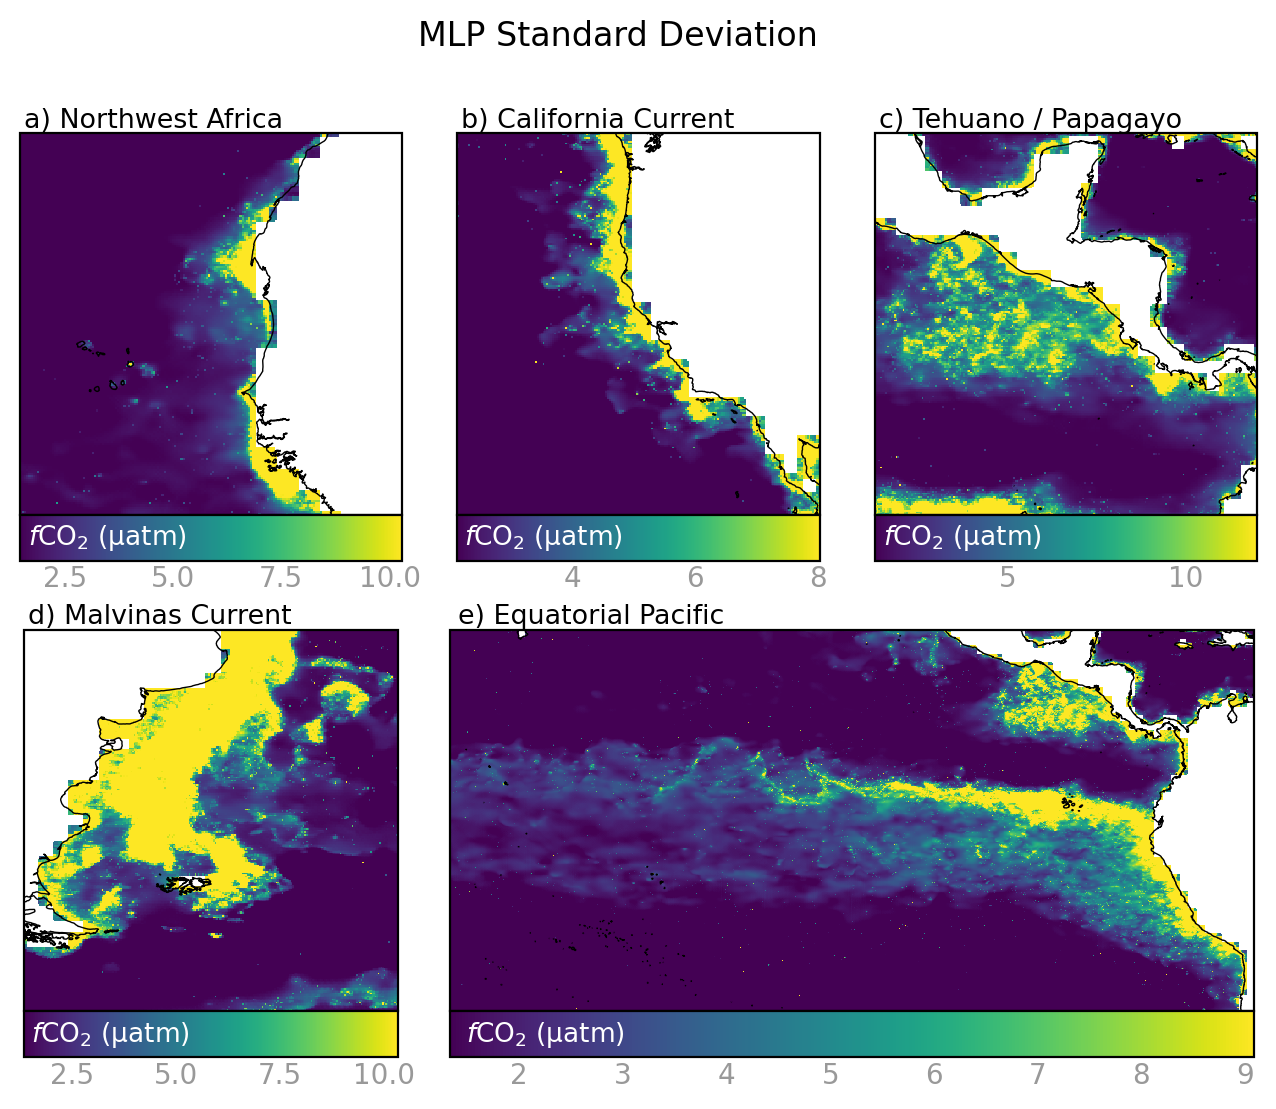

In [2]:
from infutils import plot_dfco2_regions
import matplotlib.pyplot as plt

# nw africa, california current, papagayo, malvinas, eq pacific
vmin_mean = [None]*5#(392.95, 372.96, 362.11, 325.40, 365.85)
vmax_mean = [None]*5#(433.74, 438.87, 471.49, 410.97, 530.32)

vmin_std = (1.47, 2.12, 1.29, 1.34, 1.33)
vmax_std = (10.28, 8.03, 11.98, 10.34, 9.09)
plot_dfco2_regions(sample_ds.dm_std, vmins=vmin_std, vmaxs=vmax_std, title="MLP Standard Deviation")
plt.show()


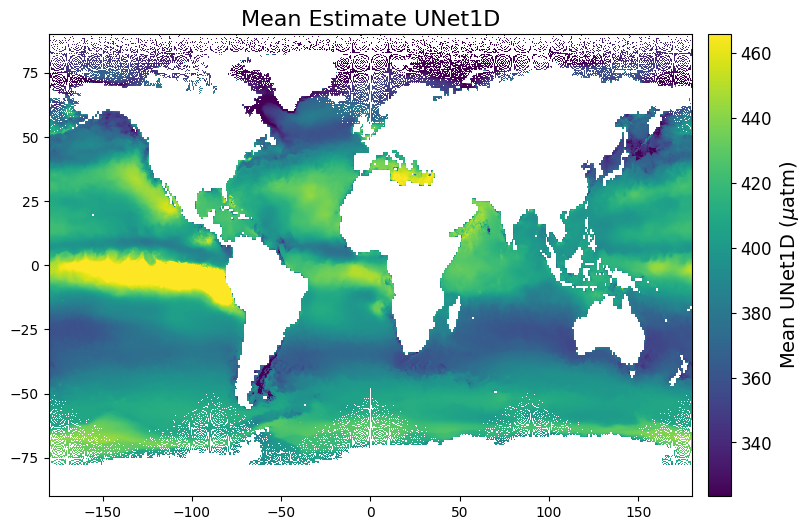

In [3]:
import matplotlib.pyplot as plt

# --- customise here ---
figsize = (10, 6)
title = "Mean Estimate UNet1D"
title_size = 16
cbar_label = r"Mean UNet1D ($\mu$atm)"
cbar_label_size = 14
cbar_tick_size = 12
# ----------------------

fig, ax = plt.subplots(figsize=figsize)

# Let xarray draw the image but *not* the colourbar or default labels
mappable = (sample_ds.dm_mean).plot(
    robust=True,
    ax=ax,
    add_colorbar=False,
    add_labels=False,
    cmap = "viridis"
)

# Title
ax.set_title(title, fontsize=title_size)

# Colourbar (beneath or beside as you prefer)
cbar = fig.colorbar(mappable, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label(cbar_label, fontsize=cbar_label_size)
cbar.ax.tick_params(labelsize=cbar_tick_size)

plt.show()


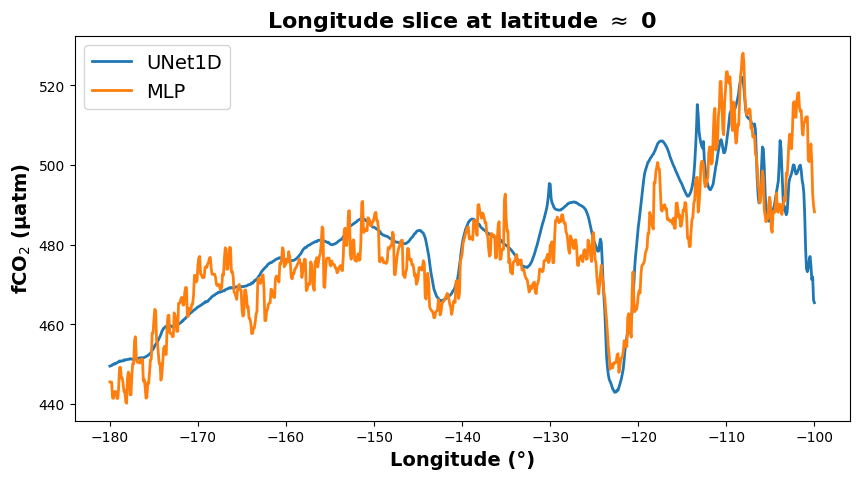

In [11]:
import matplotlib.pyplot as plt

# --- Configurable options ---
fontsize = 14
fontweight = "bold"
linewidth=2

x_label = "Longitude (°)"
y_label = "fCO$_2$ (µatm)"
line_labels = ["UNet1D", "MLP"]

lat = 0
lon_range = slice(-180, -100)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 5))

(sample_ds.sample_0
    .sel(lat=lat, lon=lon_range)
    .plot(ax=ax, label=line_labels[0], linewidth=linewidth))

(sample_ds.mlp_sample
    .sel(lat=lat, lon=lon_range)
    .plot(ax=ax, label=line_labels[1], linewidth=linewidth))

# Axis labels
ax.set_xlabel(x_label, fontsize=fontsize, fontweight=fontweight)
ax.set_ylabel(y_label, fontsize=fontsize, fontweight=fontweight)

# Title with "≈" symbol
ax.set_title(fr"Longitude slice at latitude $\approx$ {lat}", 
             fontsize=fontsize+2, fontweight=fontweight)

# Legend
ax.legend(fontsize=fontsize)

plt.show()
